In [26]:
import pandas as pd
import numpy as np
import glob
import os
import munge_help
from time import time

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,plot_roc_curve,plot_precision_recall_curve,plot_confusion_matrix, classification_report


import utils

import xgboost as xgb

In [2]:
#load test data
X_test = utils.load_obj(path=os.path.join('data_processed', 'X_test.pkl'))
y_test = utils.load_obj(path=os.path.join('data_processed', 'y_test.pkl'))

#get path of f1 (balanced precision vs recall)
path_f1 = os.path.join('artifacts', 'grid_search_2020-11-29_f1.pkl')
#load the grid search objects
grid_f1 = utils.load_obj(path_f1)

In [3]:
# f1_arr = []
# precision_arr = []
# recall_arr = []

# for _ in range(1000):
#     #get random samples from y_test
#     y_sampled = y_test.sample(frac=0.8,
#                               replace=True)
#     #match the same indeces
#     X_sampled = X_test.loc[y_sampled.index].copy()
    
#     #make a prediction from sampled data
#     y_pred = grid_f1.predict(X_sampled)
    
#     report_dict = classification_report(y_sampled,
#                                         y_pred, 
#                                         output_dict=True)
    
#     #add the metrics to the arrays
#     f1_arr.append(report_dict['1']['f1-score'])
#     precision_arr.append(report_dict['1']['precision'])
#     recall_arr.append(report_dict['1']['recall'])


# #save for later use
# utils.save_obj(obj = f1_arr, path=os.path.join('artifacts', 'f1_arr_samples.pkl'))
# utils.save_obj(obj = precision_arr, path=os.path.join('artifacts', 'precision_arr_samples.pkl'))
# utils.save_obj(obj = recall_arr, path=os.path.join('artifacts', 'recall_arr_samples.pkl'))

In [4]:
f1_arr = utils.load_obj(path=os.path.join('artifacts', 'f1_arr_samples.pkl'))
precision_arr = utils.load_obj(path=os.path.join('artifacts', 'precision_arr_samples.pkl'))
recall_arr = utils.load_obj(path=os.path.join('artifacts', 'recall_arr_samples.pkl'))

In [22]:
#the non scipy method

precision_mean = np.mean(precision_arr)
precision_std = np.std(precision_arr)
precision_upper = precision_mean + 2*precision_std
precision_lower = precision_mean - 2*precision_std

print("precision_mean = {}\nprecision_upper = {}\nprecision_lower = {}".format(precision_mean,
                                                                                  precision_upper,
                                                                                  precision_lower))

recall_mean = np.mean(recall_arr)
recall_std = np.std(recall_arr)
recall_upper = recall_mean + 2*recall_std
recall_lower = recall_mean - 2*recall_std

print("recall_mean = {}\nrecall_upper = {}\nrecall_lower = {}".format(recall_mean,
                                                                      recall_upper,
                                                                      recall_lower))

precision_mean = 0.17967964047956678
precision_upper = 0.25057197926705715
precision_lower = 0.1087873016920764
recall_mean = 0.4209469072212416
recall_upper = 0.5644880741834016
recall_lower = 0.2774057402590816


In [37]:
#the numpy way
np.percentile(precision_arr, [5, 95])

array([0.12380952, 0.23915738])

In [38]:
np.percentile(recall_arr, [5, 95])

array([0.30640681, 0.53846154])

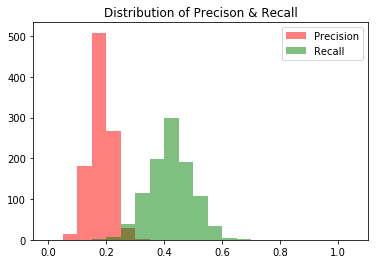

In [33]:

plt.hist(precision_arr, bins=np.arange(0, 1.1, 0.05),
         label='Precision', 
         color='red',
         alpha=0.5)



# plt.axvline(precision_upper, color='red')
# plt.axvline(precision_lower, color='red')

plt.hist(recall_arr, bins=np.arange(0, 1.1, 0.05),
         label='Recall',
         alpha=0.5,
         color='green')
# plt.axvline(recall_upper, color='yellow')
# plt.axvline(recall_lower, color='yellow')

plt.legend()

plt.title("Distribution of Precison & Recall")
plt.savefig(os.path.join('plots', 'precision_recall_hist.png'))

In [16]:
np

1000

In [17]:
len(recall_arr)

1000

In [27]:
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    """
    source: https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
    """
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [34]:
mean_confidence_interval(precision_arr)

(0.17967964047956678, 0.17747893895464964, 0.1818803420044839)

In [ ]:
mean_confidence_interval(recall_arr)